# Linear Regression and Correlation: A Biginner's Guide by Scott Hartshorn
## 2.1 What is Correlation?

In [1]:
import polars as pl
import pandas as pd
import plotnine as p9
import numpy as np

In [4]:
def plot_yY(df):
    return ( p9.ggplot(data=df, mapping=p9.aes(x='x'))
             + p9.geom_point(mapping=p9.aes(y='y'), color='blue')
             + p9.geom_line(mapping=p9.aes(y='Y'), color='red')
             + p9.theme(figure_size=(5,5))
            )

def r_squared(df):
    sst = ((df['y'] - df['y'].mean())**2).sum()
    ssr = ((df['y'] - df['Y'])**2).sum()
    rsq = 1 - ssr/sst
    print(f'Sum Squared Total Error: {sst:.2f}')
    print(f'Sum Squared Regression Error: {ssr:.2f}')
    print(f"R Squared is {rsq:.3f}")
    print(f"SSr/SSt = {(ssr/sst)*100:.2f}% of the Total Error remaining.")

### Calculate $R^2$

* $R^2 = 1 - \frac{SS_{regression}}{SS_{total}}$
* $SS_{regression} = \sum{(y_i - \hat{y})^2}$
* $SS_{total} = \sum{(y_i - \overline{y})^2}$

### Zero Correlation
> Or it could mean that a different regression would work, like this squared plot below.  
> In this plot, if we used $y = x^2$ we could get a perfect regression.  
> None-the-less, we can’t do better than **y = mean value** of all y’s for this set of data with a linear regression.  
### $y=x^2$

shape: (15, 3)
┌─────┬─────┬─────┐
│ x   ┆ y   ┆ Y   │
│ --- ┆ --- ┆ --- │
│ i64 ┆ i64 ┆ i64 │
╞═════╪═════╪═════╡
│ -7  ┆ 49  ┆ 49  │
│ -6  ┆ 36  ┆ 36  │
│ -5  ┆ 25  ┆ 25  │
│ -4  ┆ 16  ┆ 16  │
│ -3  ┆ 9   ┆ 9   │
│ …   ┆ …   ┆ …   │
│ 3   ┆ 9   ┆ 9   │
│ 4   ┆ 16  ┆ 16  │
│ 5   ┆ 25  ┆ 25  │
│ 6   ┆ 36  ┆ 36  │
│ 7   ┆ 49  ┆ 49  │
└─────┴─────┴─────┘
Sum Squared Total Error: 4125.33
Sum Squared Regression Error: 0.00
R Squared is 1.000
SSr/SSt = 0.00% of the Total Error remaining.


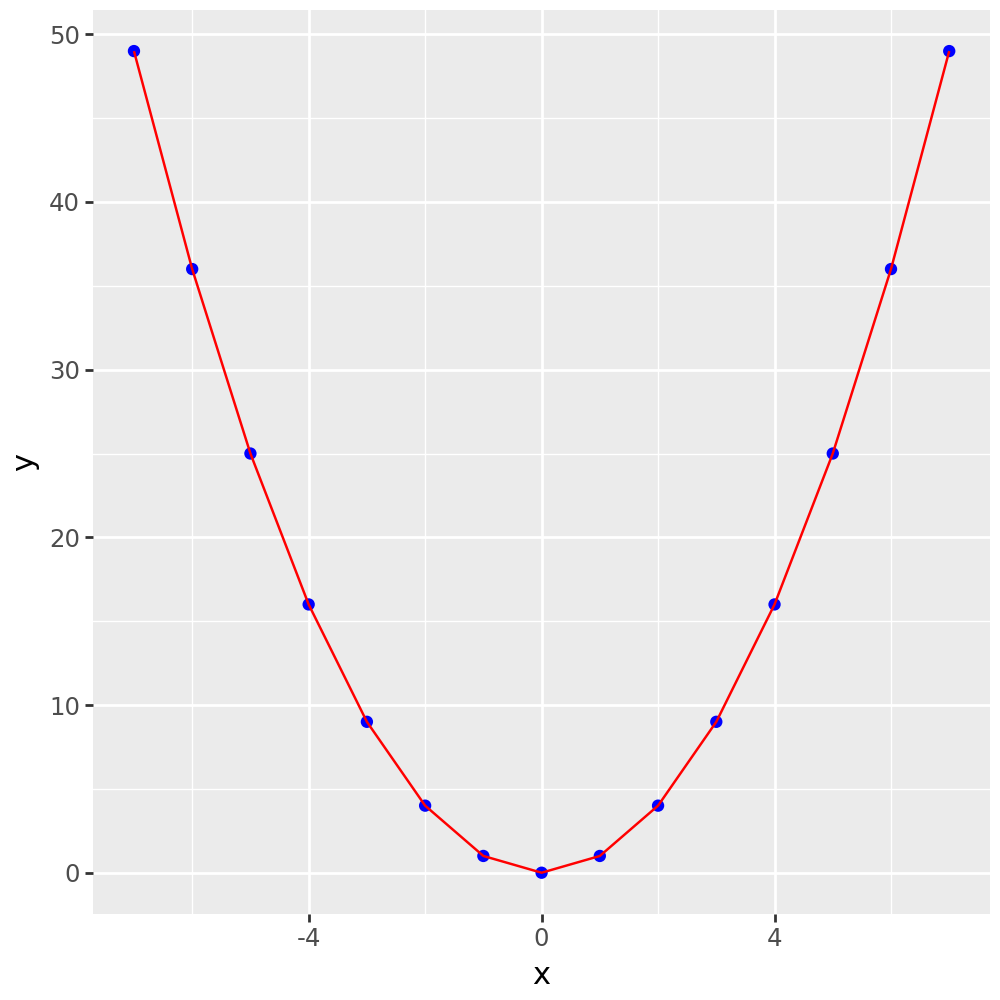

In [61]:
x=[i for i in range(-7,8)]
y = [i**2 for i in x]
df = pl.DataFrame({'x':x, 'y':y, 'Y':y})
print(df)
plot = plot_yY(df)
r_sqared(df)
plot

shape: (15, 3)
┌─────┬─────┬───────────┐
│ x   ┆ y   ┆ Y         │
│ --- ┆ --- ┆ ---       │
│ i64 ┆ i64 ┆ f64       │
╞═════╪═════╪═══════════╡
│ -7  ┆ 49  ┆ 18.666667 │
│ -6  ┆ 36  ┆ 18.666667 │
│ -5  ┆ 25  ┆ 18.666667 │
│ -4  ┆ 16  ┆ 18.666667 │
│ -3  ┆ 9   ┆ 18.666667 │
│ …   ┆ …   ┆ …         │
│ 3   ┆ 9   ┆ 18.666667 │
│ 4   ┆ 16  ┆ 18.666667 │
│ 5   ┆ 25  ┆ 18.666667 │
│ 6   ┆ 36  ┆ 18.666667 │
│ 7   ┆ 49  ┆ 18.666667 │
└─────┴─────┴───────────┘
Sum Squared Total Error: 4125.333333333334
Sum Squared Regression Error: 4125.333333333334
R Squared is 0.000
SSr/SSt = 100.00% of the Total Error remaining.


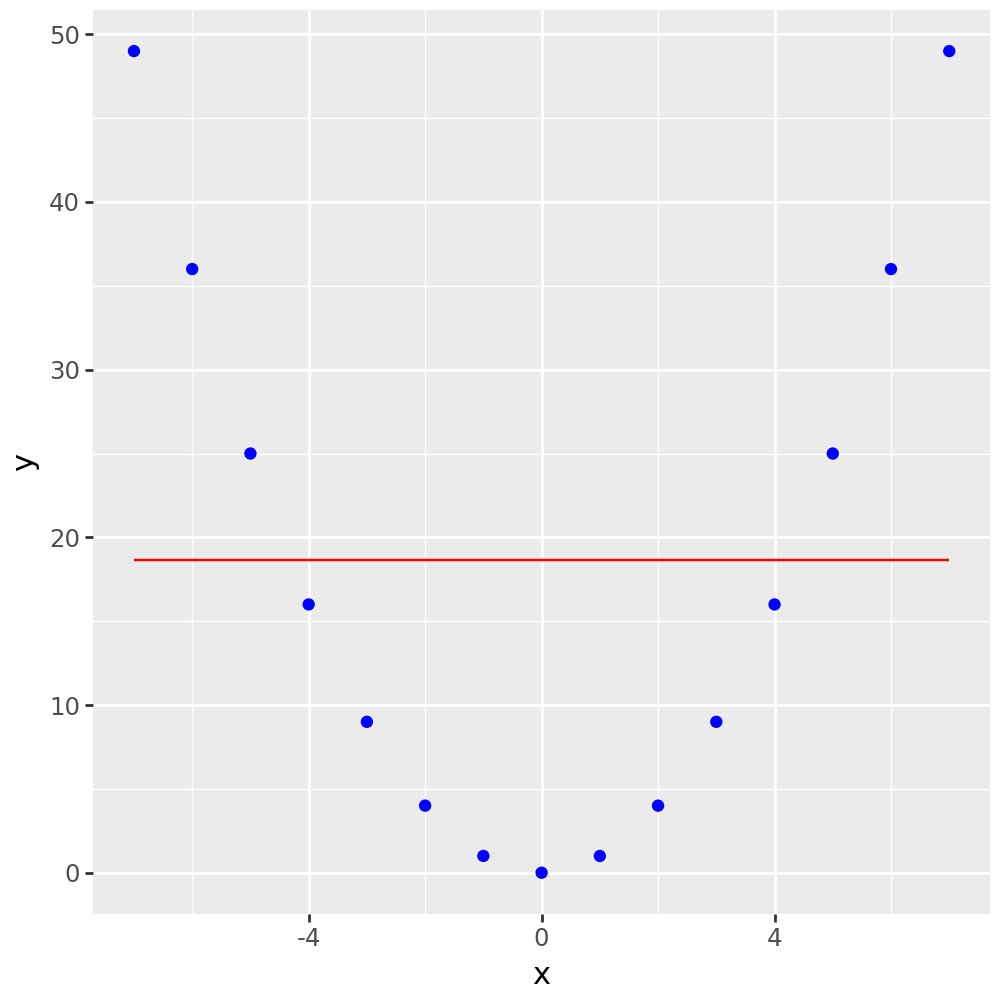

In [59]:
x=[i for i in range(-7,8)]
y = [i**2 for i in x]
Y = [float(np.mean(y)) for _ in x]
df = pl.DataFrame({'x':x, 'y':y, 'Y':Y})
print(df)
plot = plot_yY(df)
r_sqared(df)
plot

In [12]:
#x=[-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7]
#y=[49, 36, 25, 16, 9, 4, 1, 0, 1, 4, 9, 16, 25, 36, 49]

x=[i for i in range(-7,8)]
y = [i**2 for i in x]
print(f'x={x}')
print(f'y={y}')
#Correlation between x and y is 0.
correlation = np.corrcoef(x, y)[0, 1]
print(f'correlation:{float(correlation):.19f}')


x=[-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7]
y=[49, 36, 25, 16, 9, 4, 1, 0, 1, 4, 9, 16, 25, 36, 49]
correlation:0.0000000000000000099
